In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt # https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot

%matplotlib inline

from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format='retina' # set_matplotlib_formats("retina") 

print(f"{np.__version__}")
print(f"{mpl.__version__}")

1.23.5
3.7.1


In [10]:
student_df = pd.read_csv("../data/StudentsPerformance.csv")
student_df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
263,female,group E,high school,standard,none,99,93,90
678,male,group D,associate's degree,free/reduced,none,81,75,78
369,female,group D,some high school,standard,none,73,84,85
808,male,group C,high school,standard,none,90,75,69
626,male,group B,associate's degree,free/reduced,completed,69,70,63


In [18]:
group = student_df.groupby("gender")["race/ethnicity"].value_counts().sort_index()
group 

gender  race/ethnicity
female  group A            36
        group B           104
        group C           180
        group D           129
        group E            69
male    group A            53
        group B            86
        group C           139
        group D           133
        group E            71
Name: race/ethnicity, dtype: int64

### multiple bar plots

- multiple bar plots  
  - stacked bar plot  
    - percentage stacked bar chart
  - overlapped bar plot
  - groupped bar plot



### bar, barh

<BarContainer object of 5 artists>

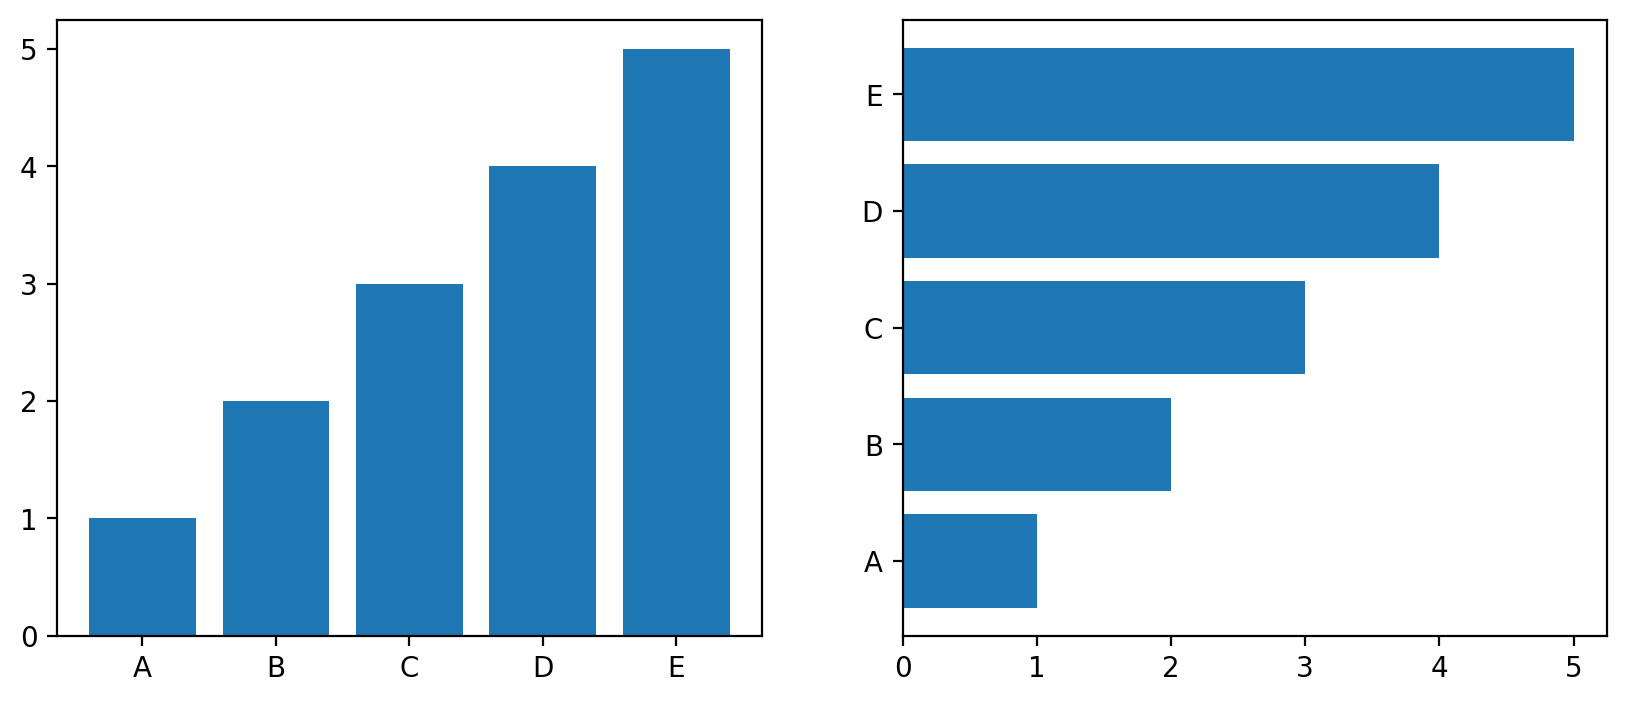

In [5]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

fig, axes = plt.subplots(1, 2, figsize=(10, 4)) # 1 row, 2 columns로 2개가 만들어짐

x = list("ABCDE")
y = np.array([1, 2, 3, 4, 5])

axes[0].bar(x, y) # (A, 1), (B, 2), ...
axes[1].barh(x, y)

#### multiple bar plot

<BarContainer object of 5 artists>

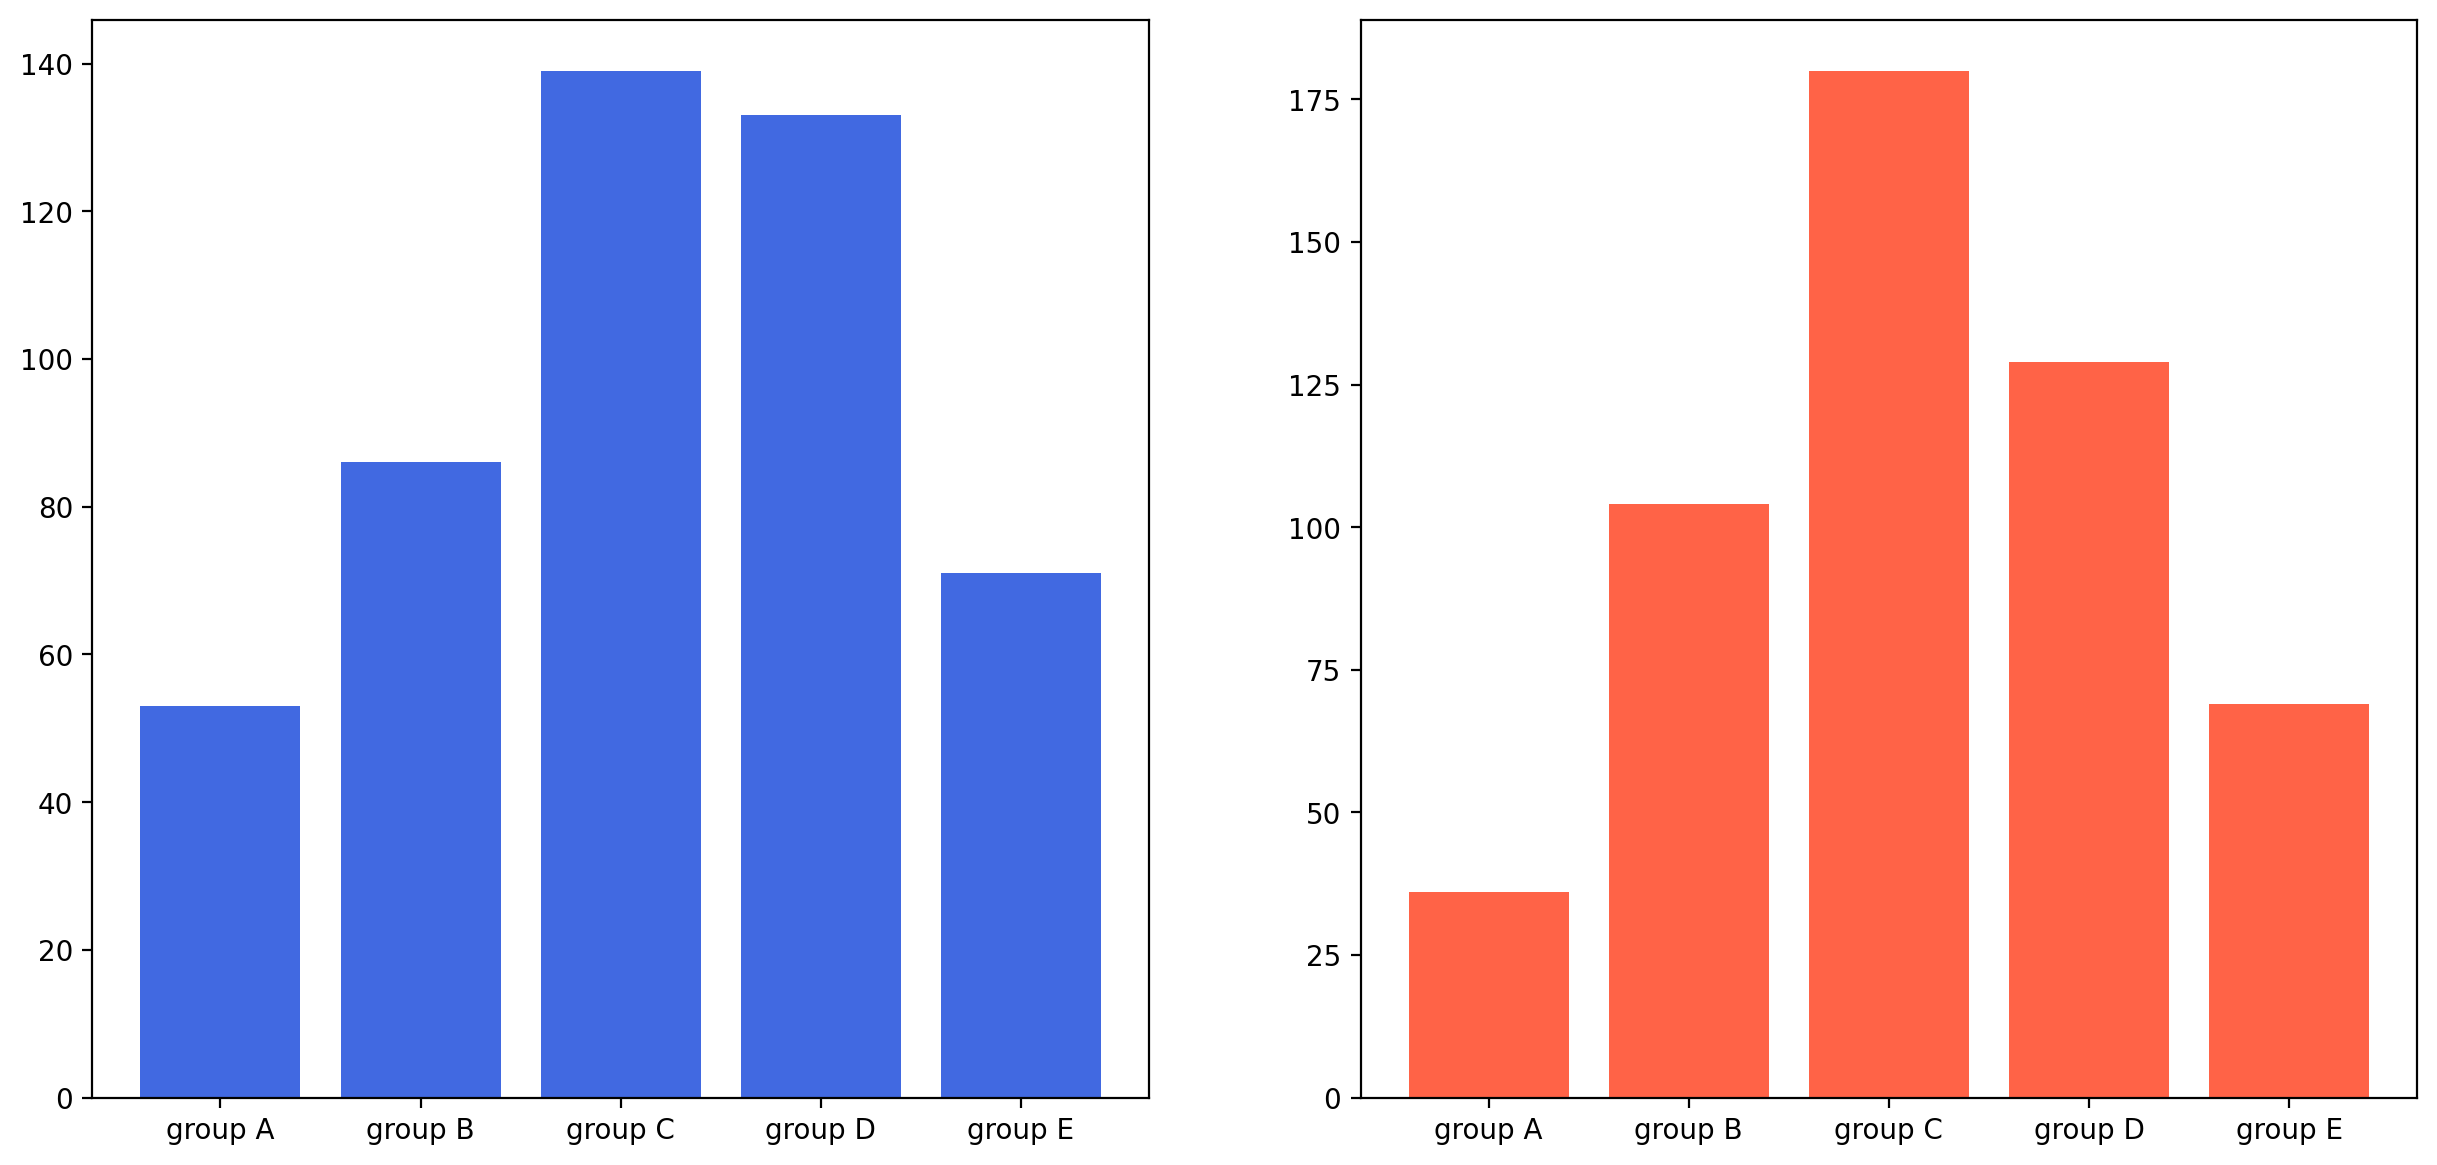

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(group["male"].index, group["male"], color="royalblue")
axes[1].bar(group["female"].index, group["female"], color="tomato")
# 분포는 비슷해보이나 y축의 scale이 다름. 성별 차이를 보여주는데 단순히 나열하는 것으로는 약간 부족함.

- 방법 1 : sharey 속성을 통해서 y축을 통일하기

<BarContainer object of 5 artists>

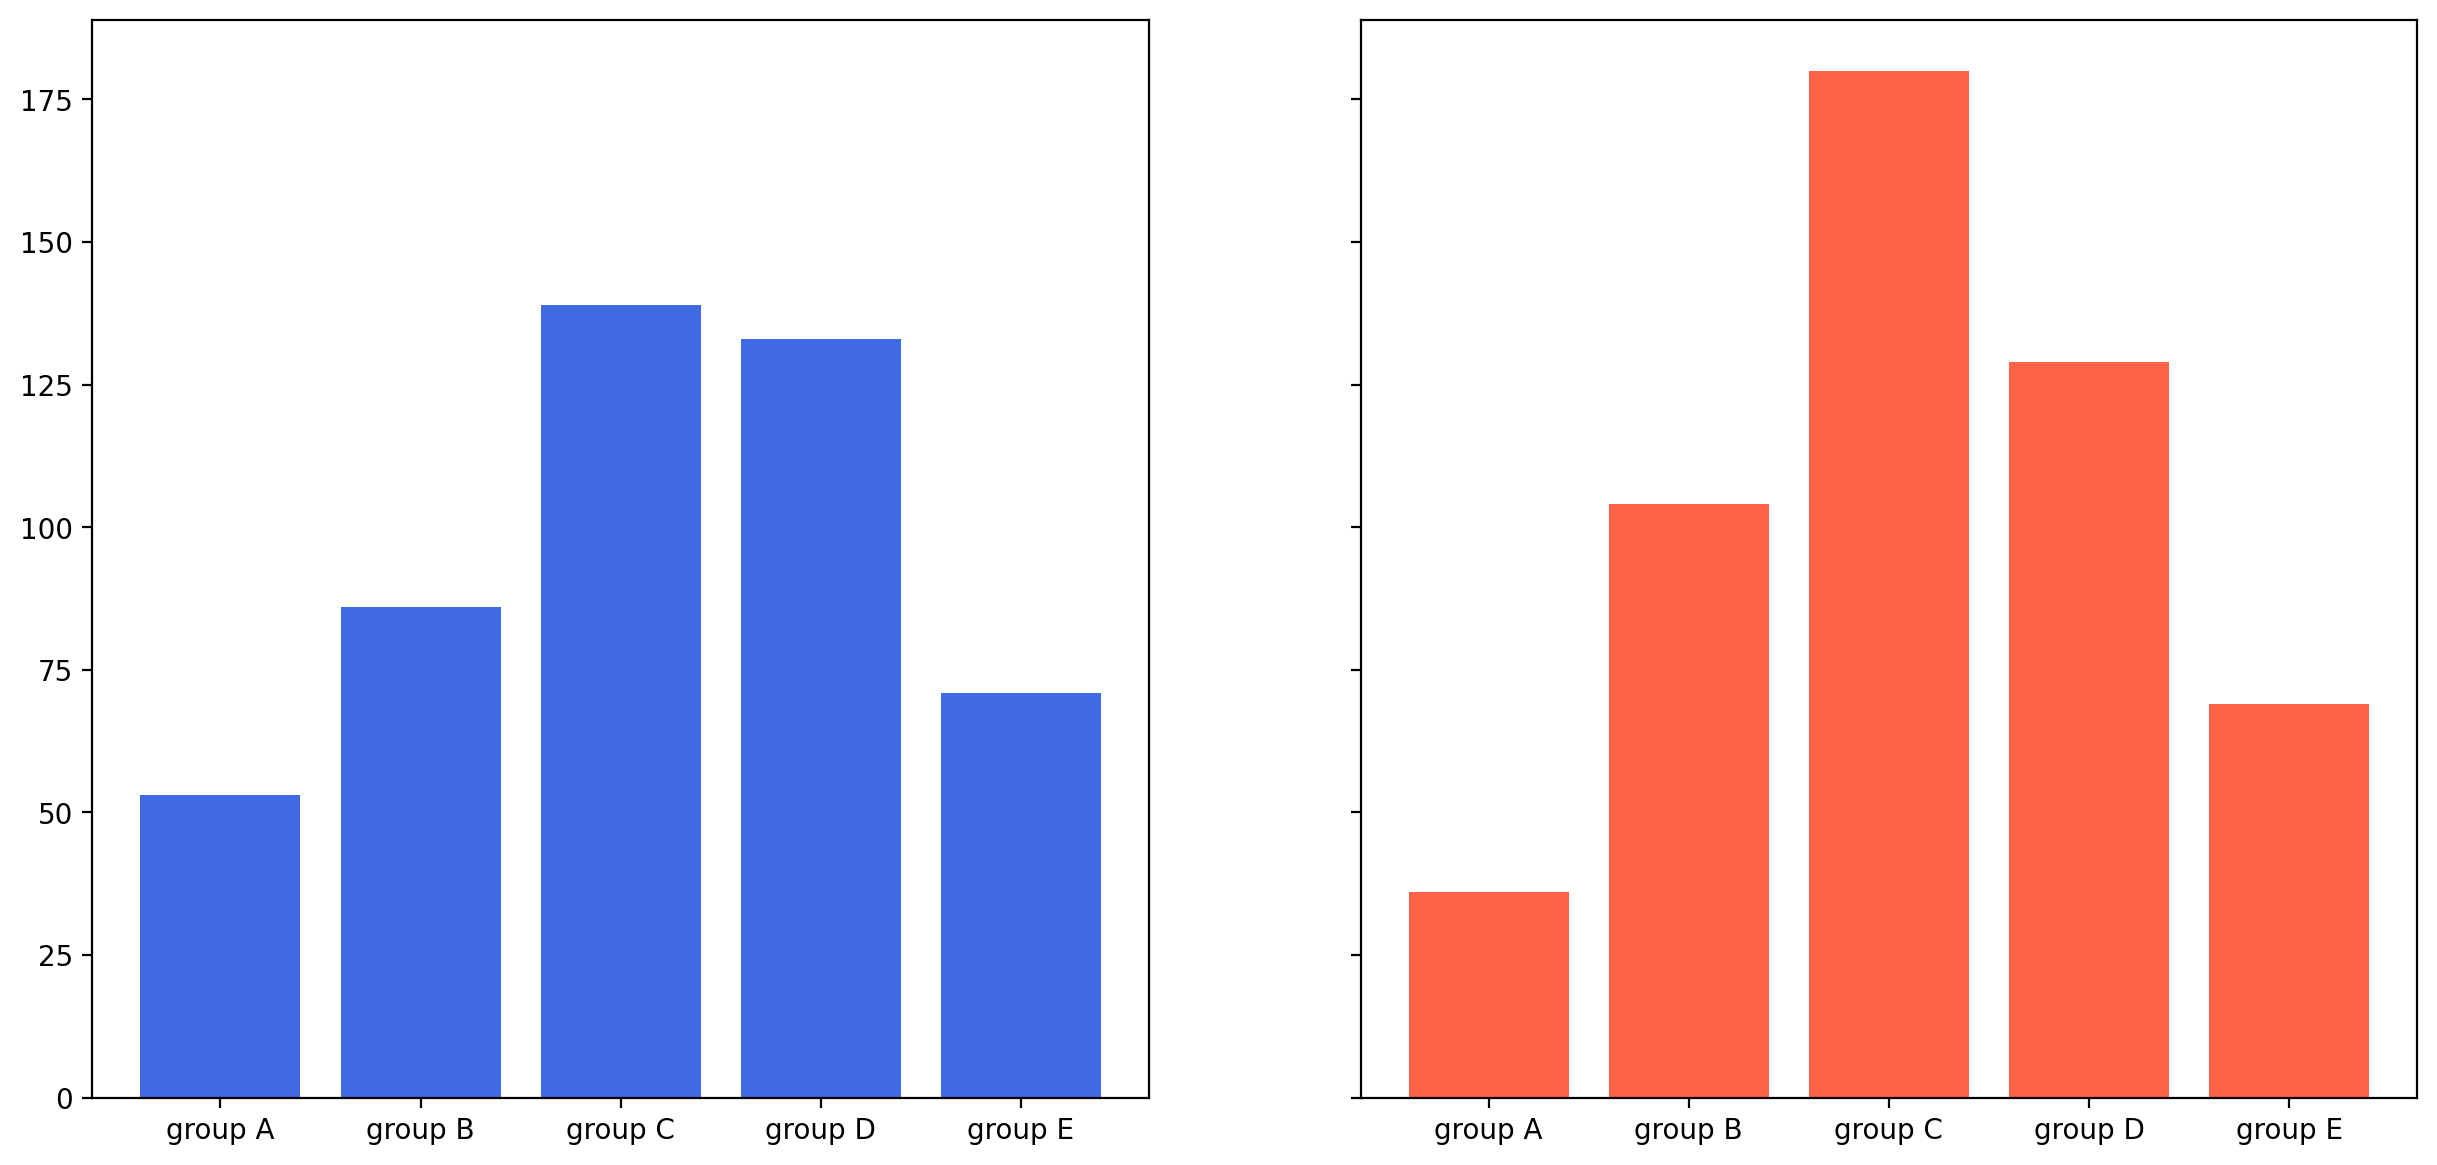

In [22]:
# sharey 속성을 통해서 y축을 통일하기
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
axes[0].bar(group["male"].index, group["male"], color="royalblue")
axes[1].bar(group["female"].index, group["female"], color="tomato")
# 분포는 비슷해보이나 y축의 scale이 다름. 성별 차이를 보여주는데 단순히 나열하는 것으로는 약간 부족함.

- 방법 2 : y축 설정하기

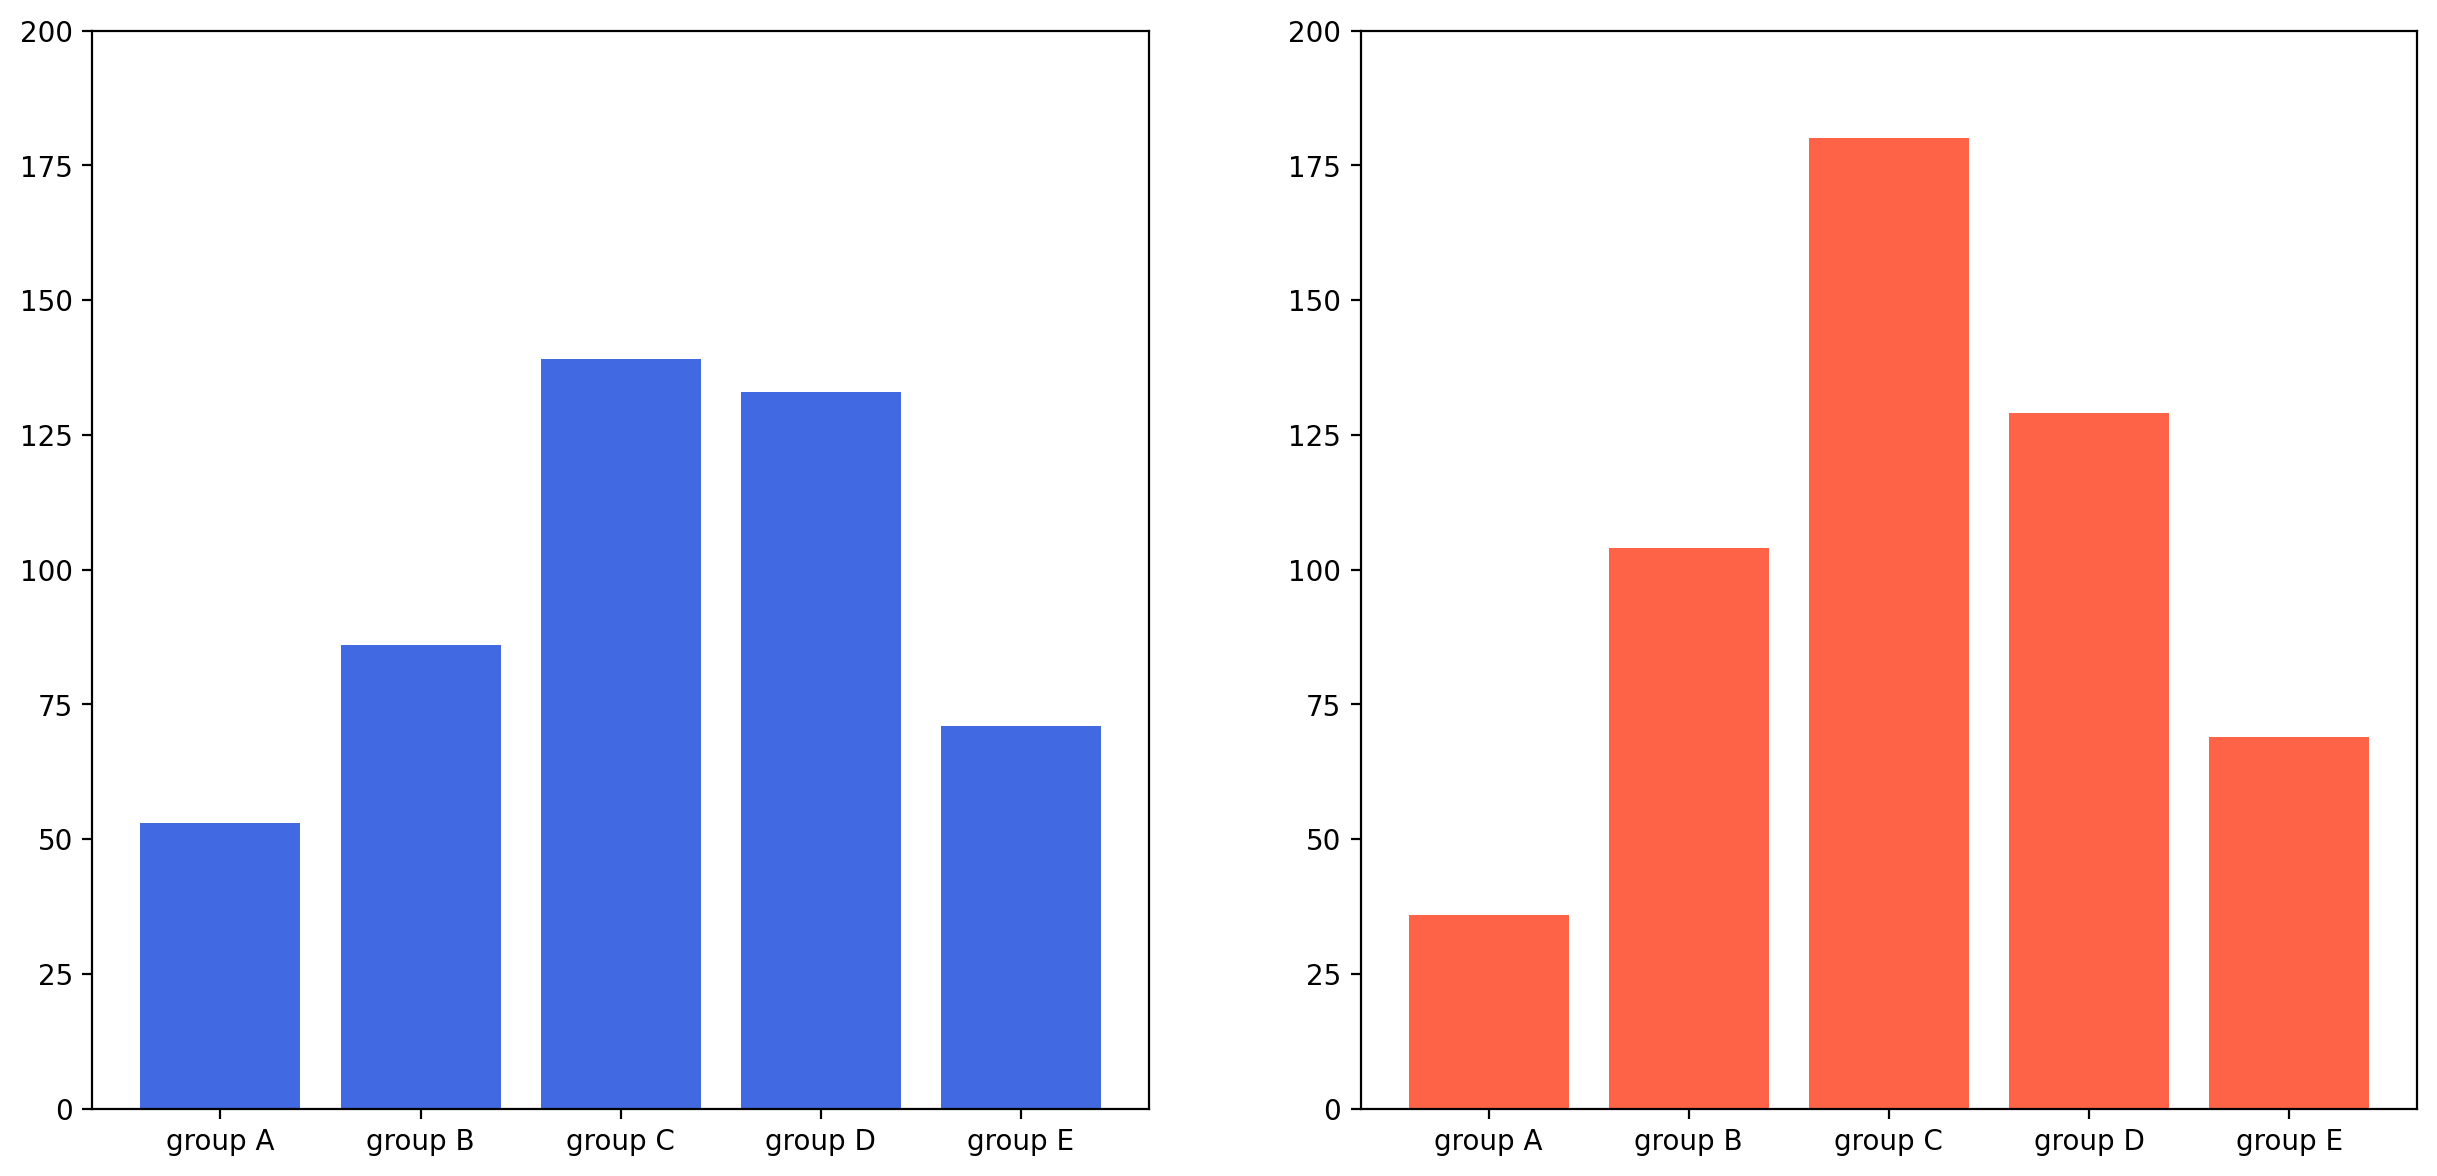

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(group["male"].index, group["male"], color="royalblue")
axes[1].bar(group["female"].index, group["female"], color="tomato")

for ax in axes:
    ax.set_ylim(0, 200)

### stacked bar plot

bottom 파라미터를 주어서 쌓아올리기

<BarContainer object of 5 artists>

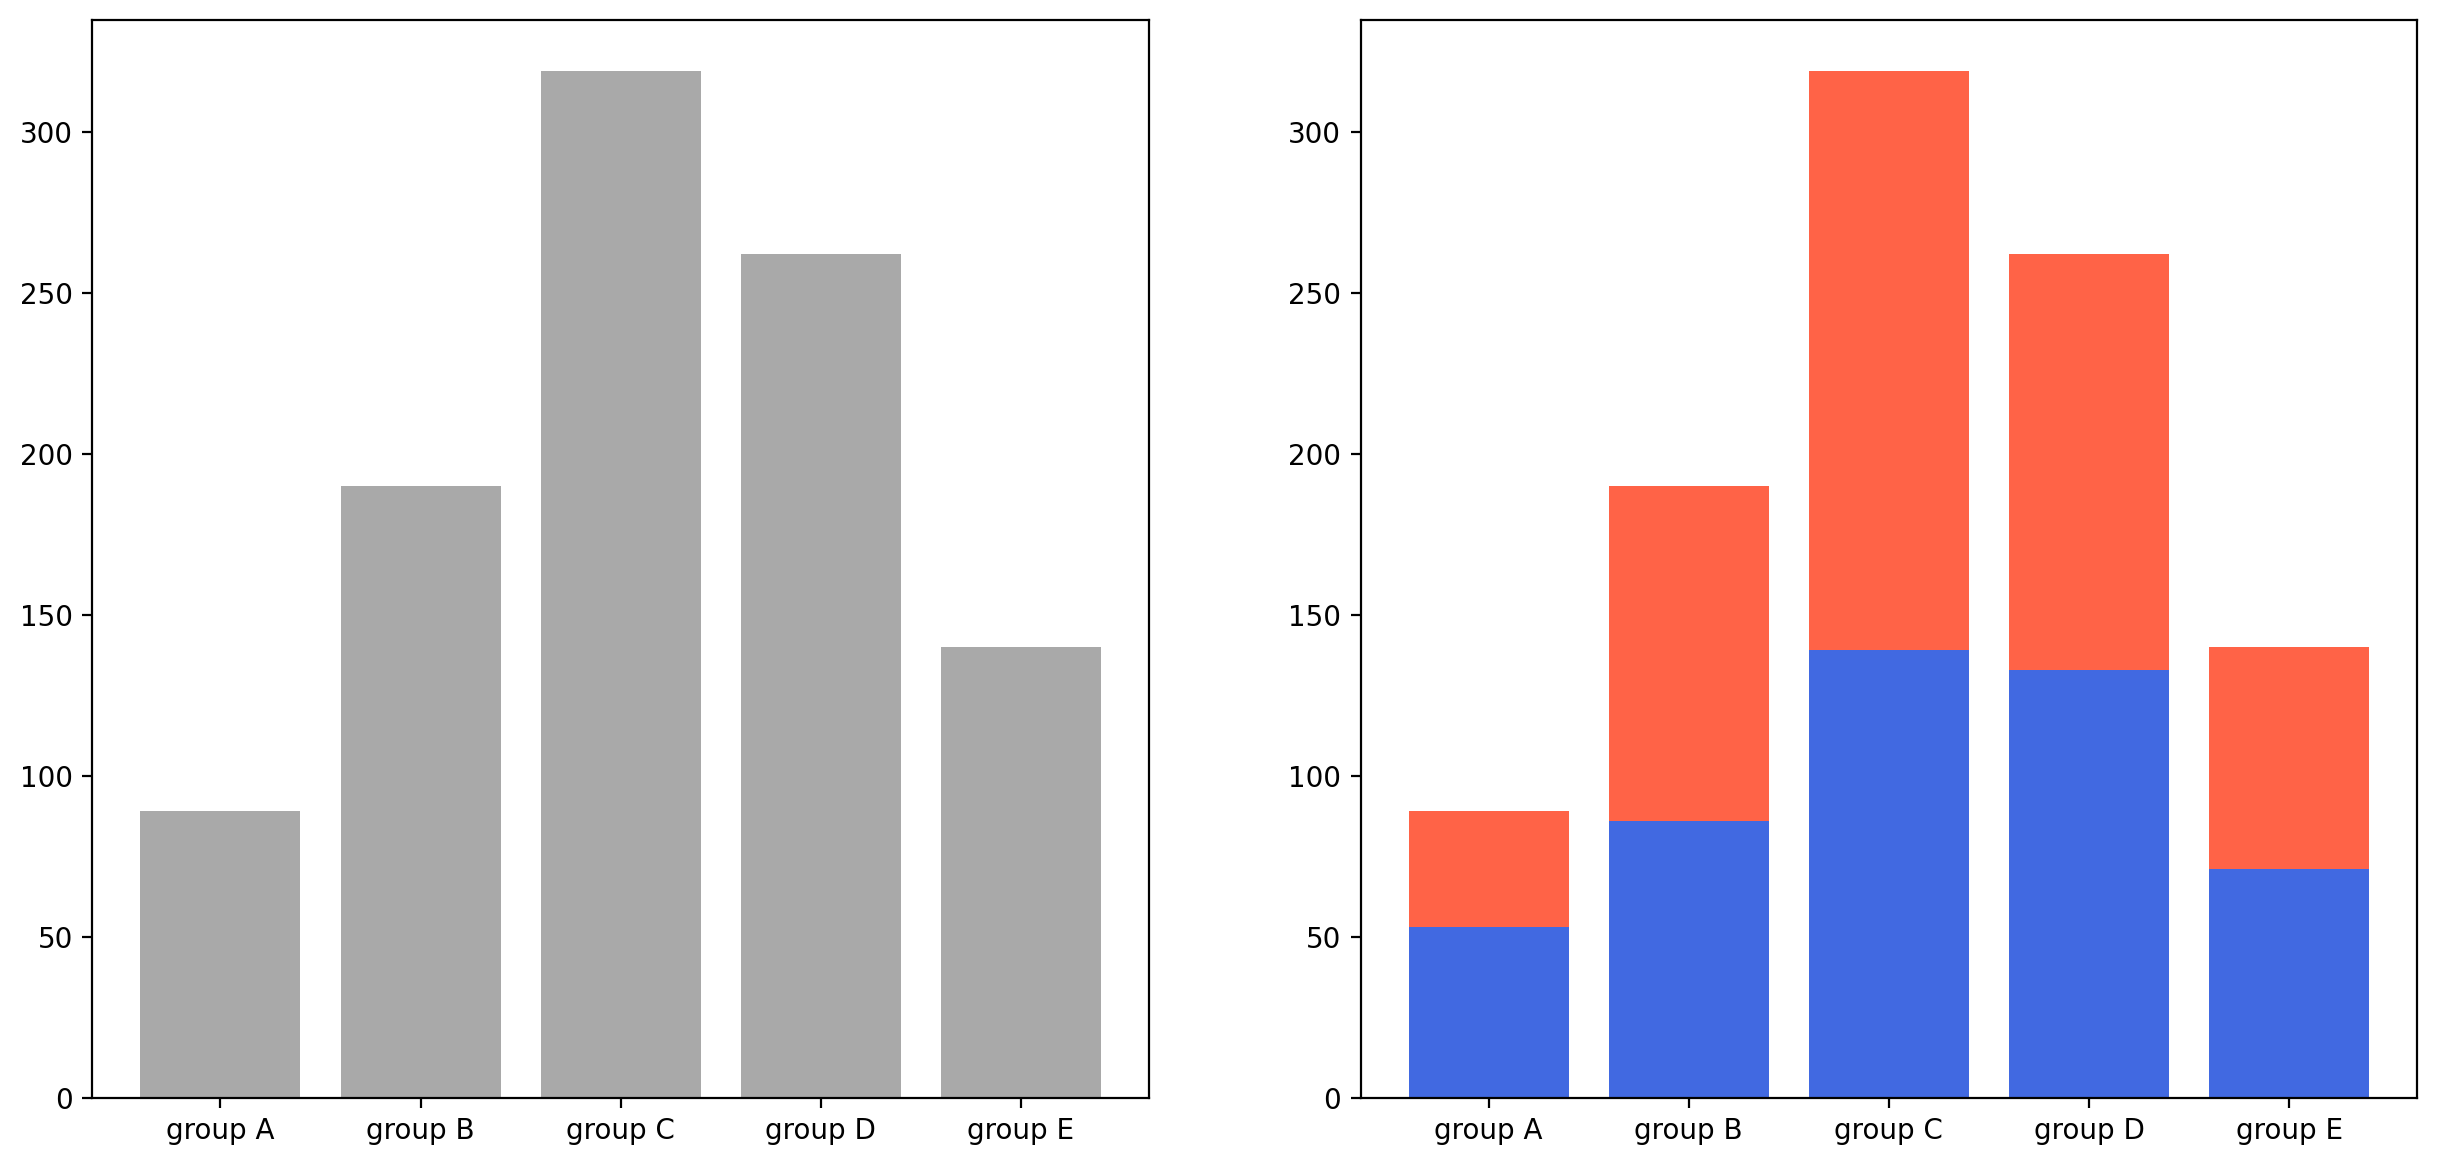

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

group_cnt = student_df["race/ethnicity"].value_counts().sort_index()
axes[0].bar(group_cnt.index, group_cnt, color="darkgray")

axes[1].bar(group["male"].index, group["male"], color="royalblue")
axes[1].bar(group["female"].index, group["female"], bottom=group["male"], color="tomato")

### percentage stacked bar chart

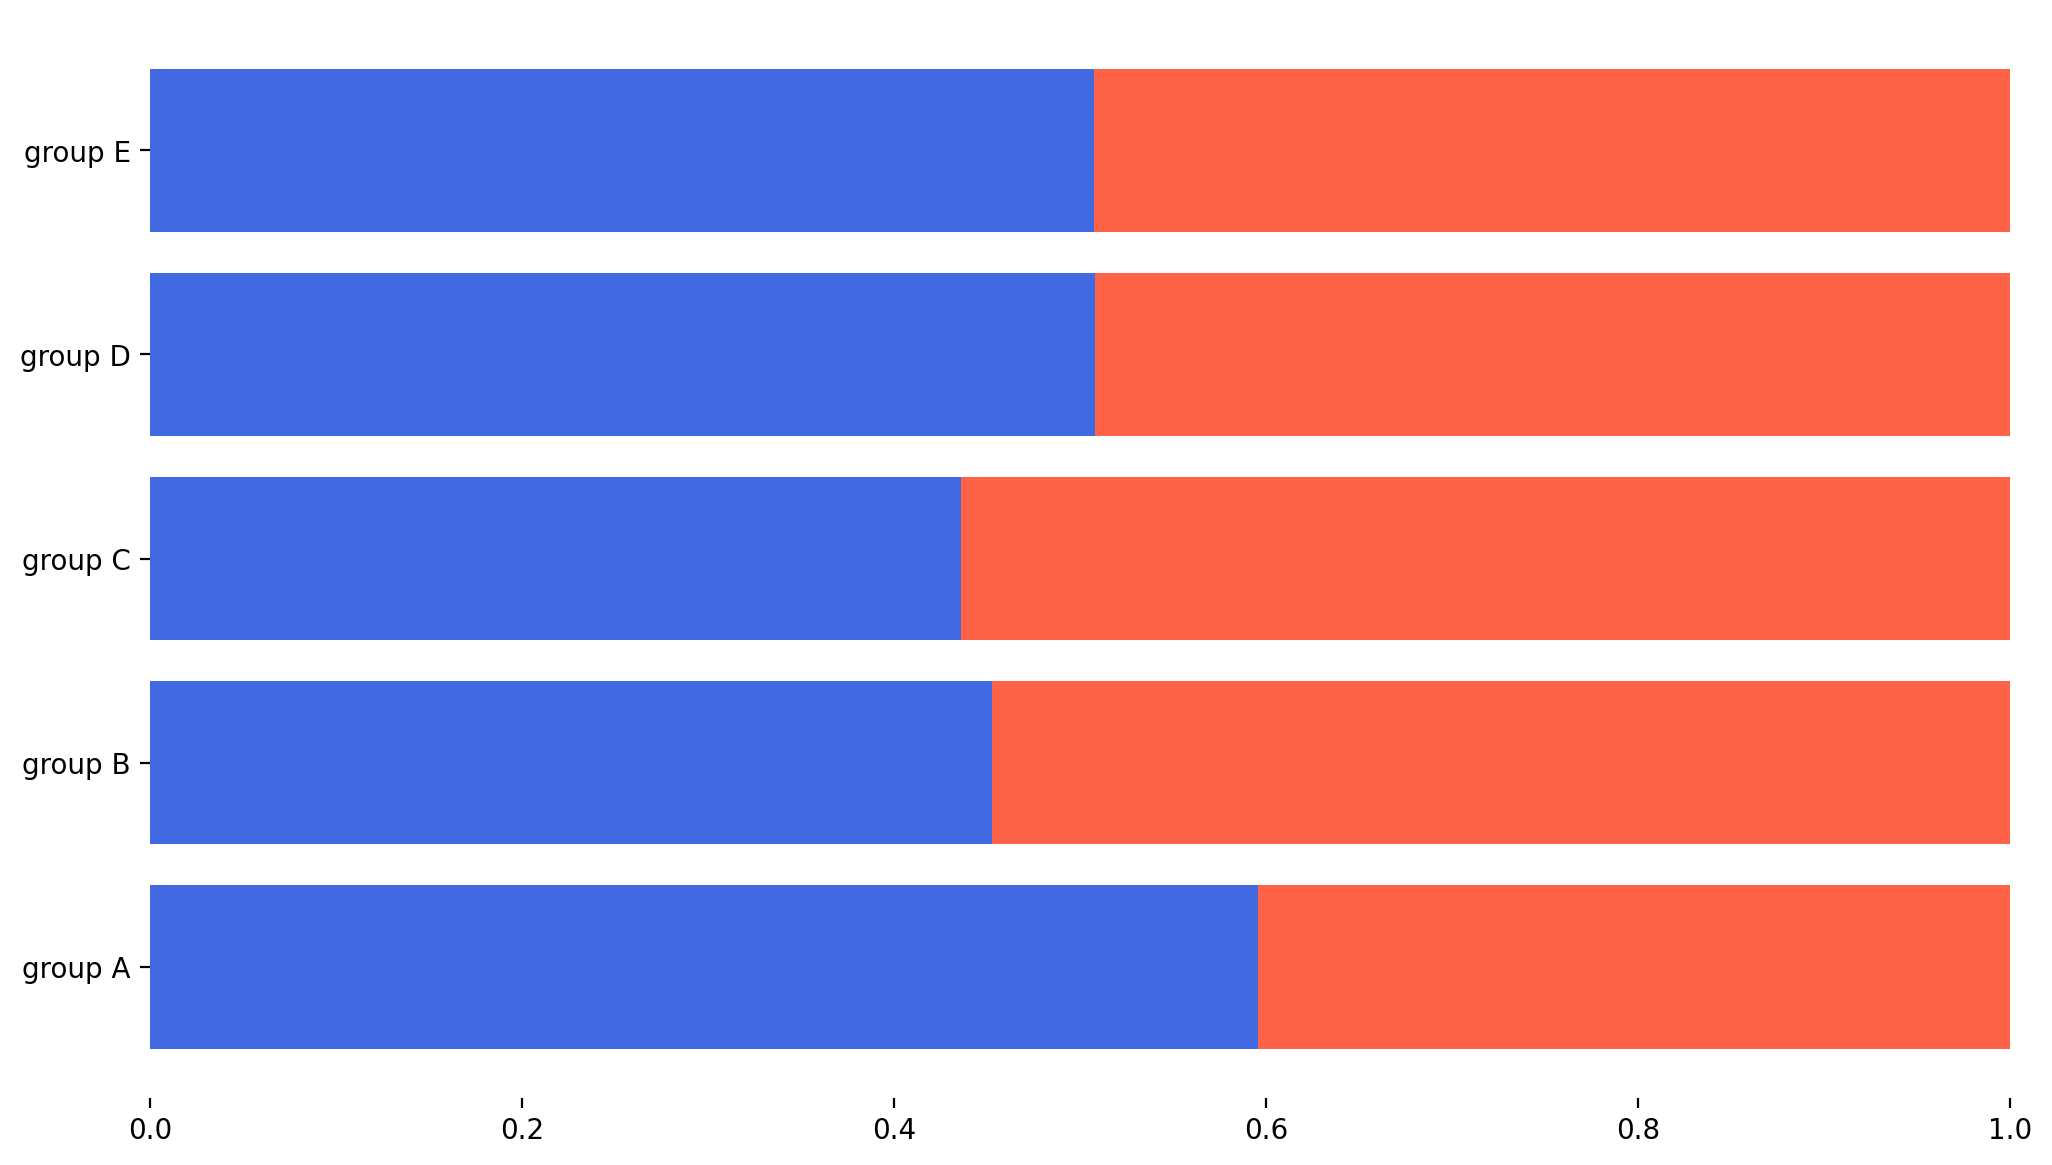

In [39]:
fig, axes = plt.subplots(1, 1, figsize=(12, 7))

total = group["male"] + group["female"]

axes.barh(group["male"].index, group["male"]/total, color="royalblue")
axes.barh(group["female"].index, group["female"]/total, left=group["male"]/total, color="tomato")

axes.set_xlim(0, 1)

# 단순히 변을 없애주는 도구
for s in ["top", "bottom", "left", "right"]:
    axes.spines[s].set_visible(False)

### overlapped bar plot

단순히 겹쳐서 그리는 것임. alpha(투명도) 조정해서 같은 axes에 그리기만 하면 됨

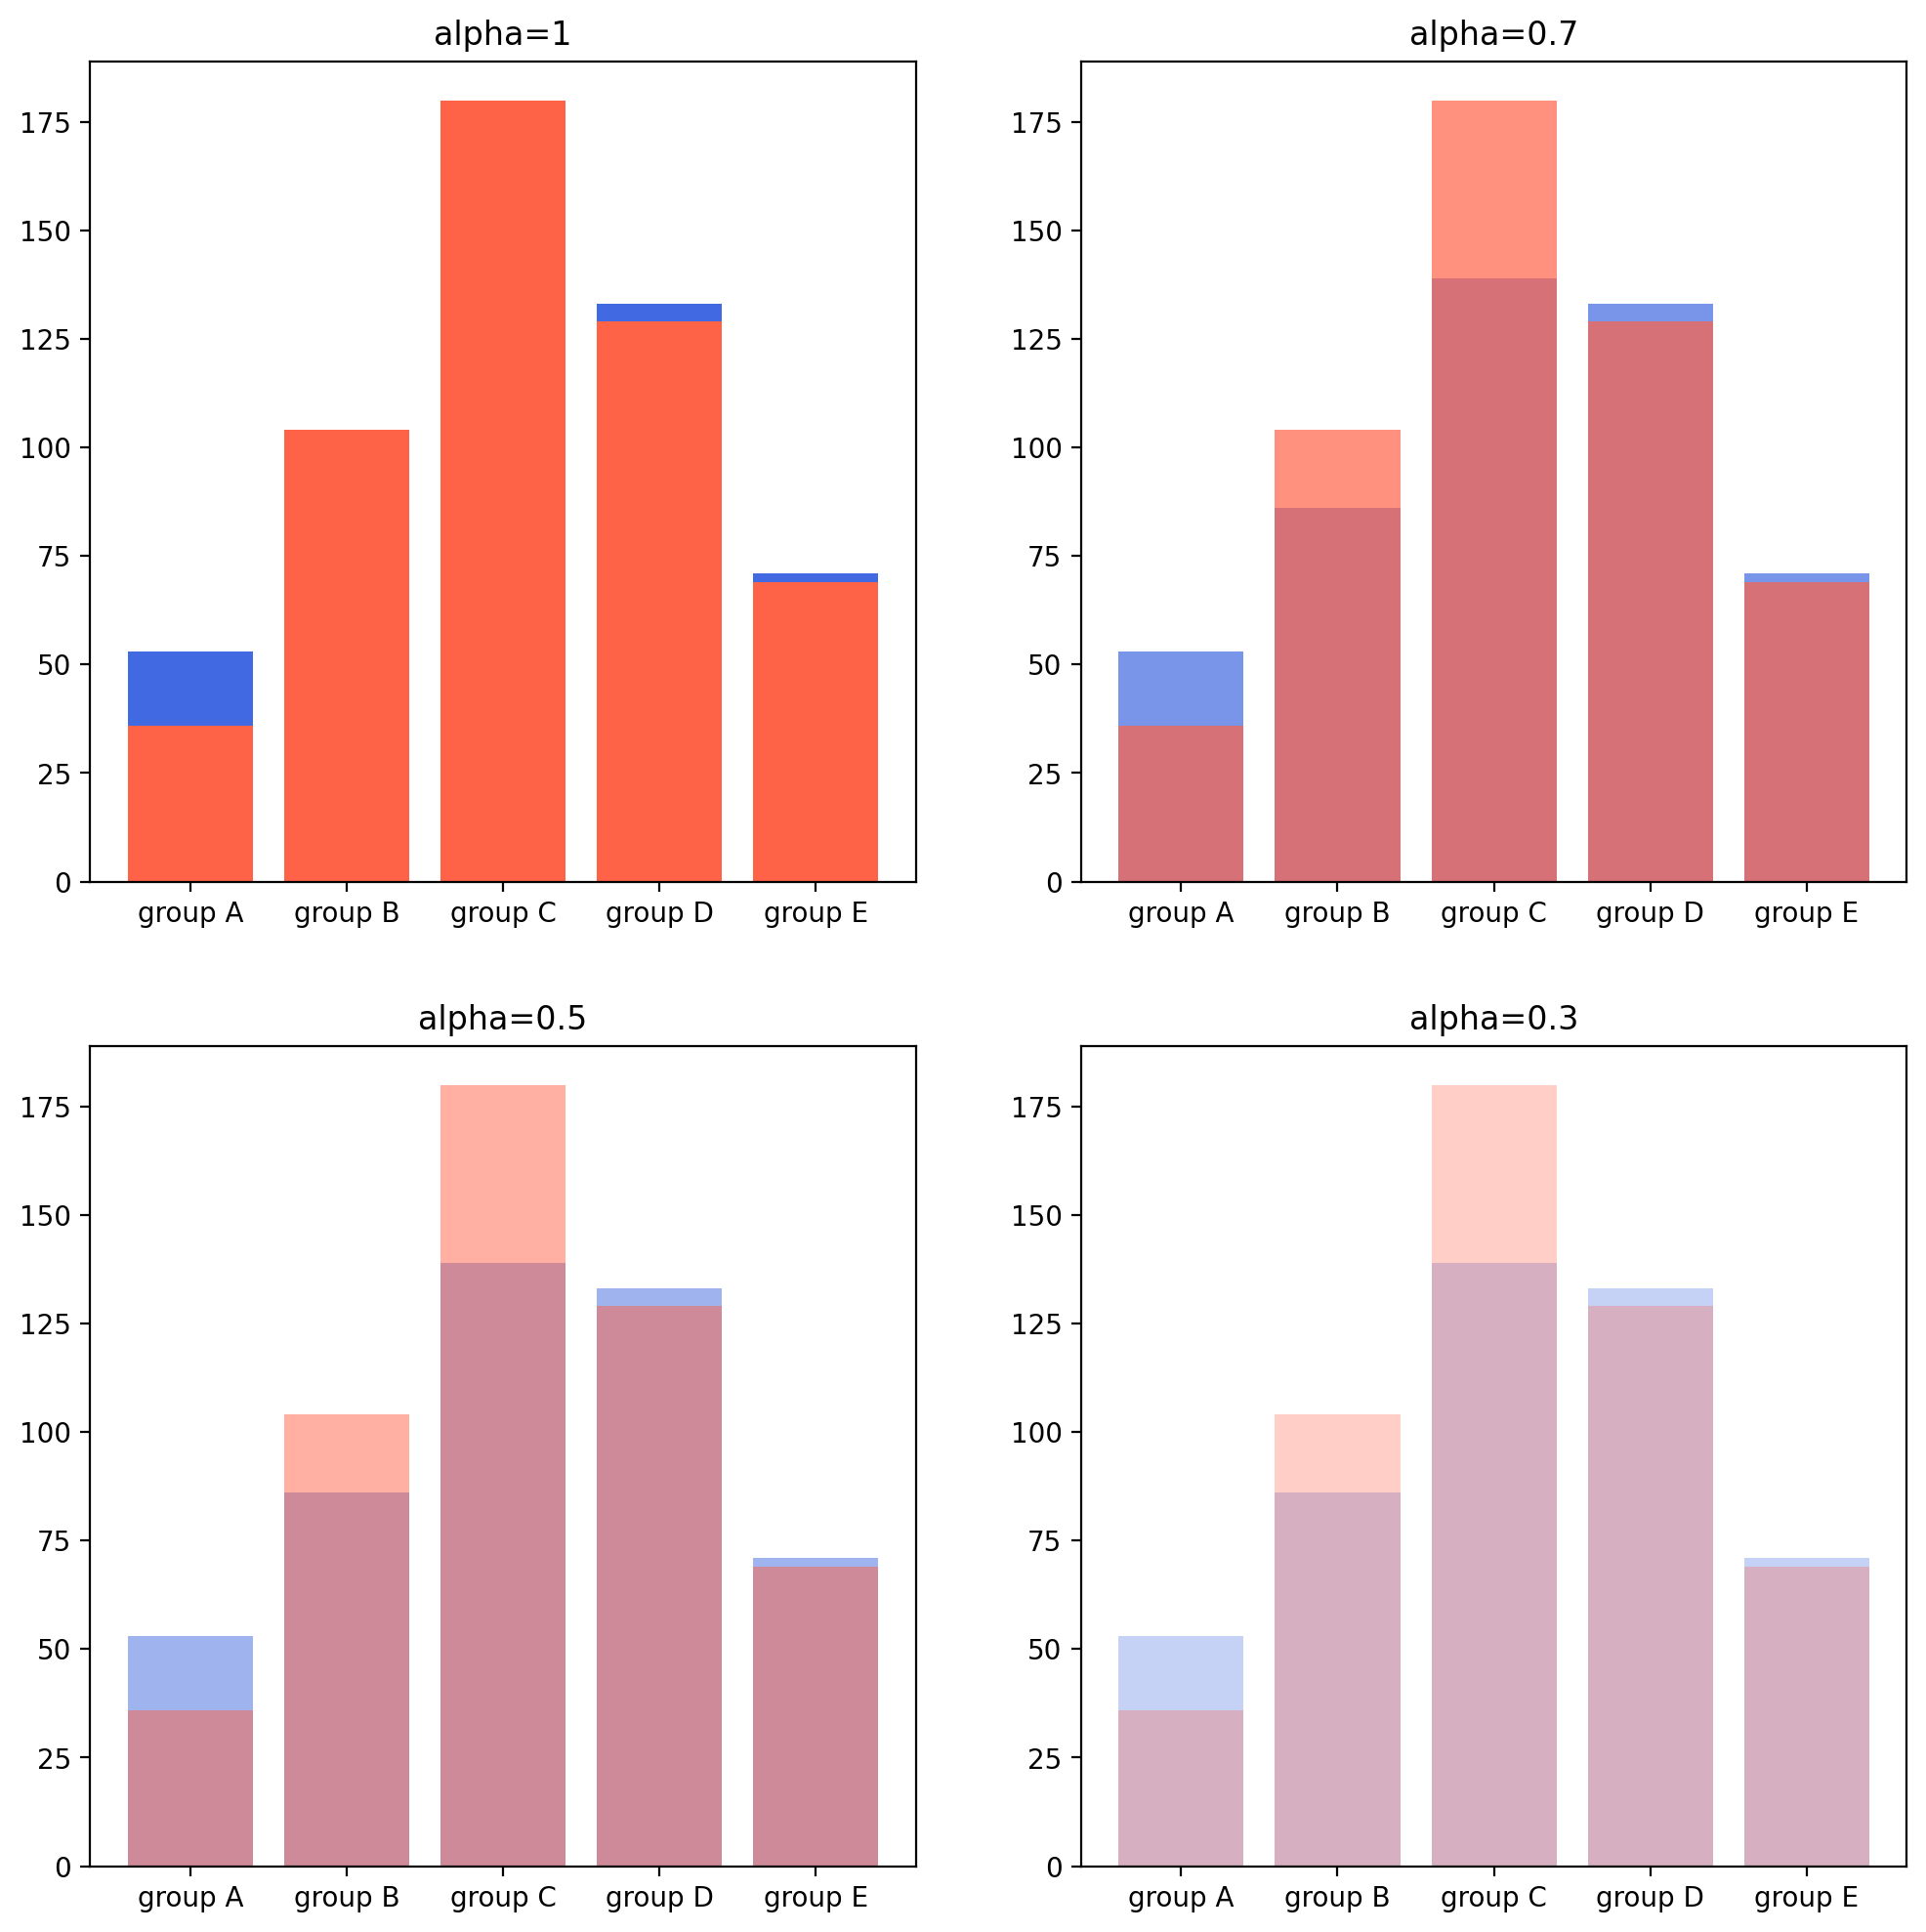

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for idx, alpha in enumerate([1, 0.7, 0.5, 0.3]):
    axes[idx].bar(group["male"].index, group["male"], color="royalblue", alpha=alpha)
    axes[idx].bar(group["female"].index, group["female"], color="tomato", alpha=alpha)
    axes[idx].set_title(f"alpha={alpha}")

### groupped bar plot

여러 요소를 bar plot으로 비교하는데 대부분의 경우 적합하나 matplotlib에서 축 조정이 좀 귀찮음.

본래 축이 0, 1, 2, 3로 시작한다면
- 한 그래프는 [0, 1, 2, 3] - width/2 쪽으로 왼쪽으로 치워놓고
- 다른 한 그래프는 [0, 1, 2, 3] + width/2 쪽으로 오른쪽으로 치워놔야 함

더 나아가, 그룹이 n개 라면
- 2 -> [-1/2, 1/2]
- 3 -> [-1, 0, 1]
- 4 -> [-3/2, -1/2, 1/2, 3/2] 
꼴로 정렬해주어야 함.

$-\frac{N-1}{2} ~ \frac{N-1}{2}$ 사이에 분자의 잔차가 2씩 증가하도록 잘라야 함. 

[Text(0, 0, 'group A'),
 Text(1, 0, 'group B'),
 Text(2, 0, 'group C'),
 Text(3, 0, 'group D'),
 Text(4, 0, 'group E')]

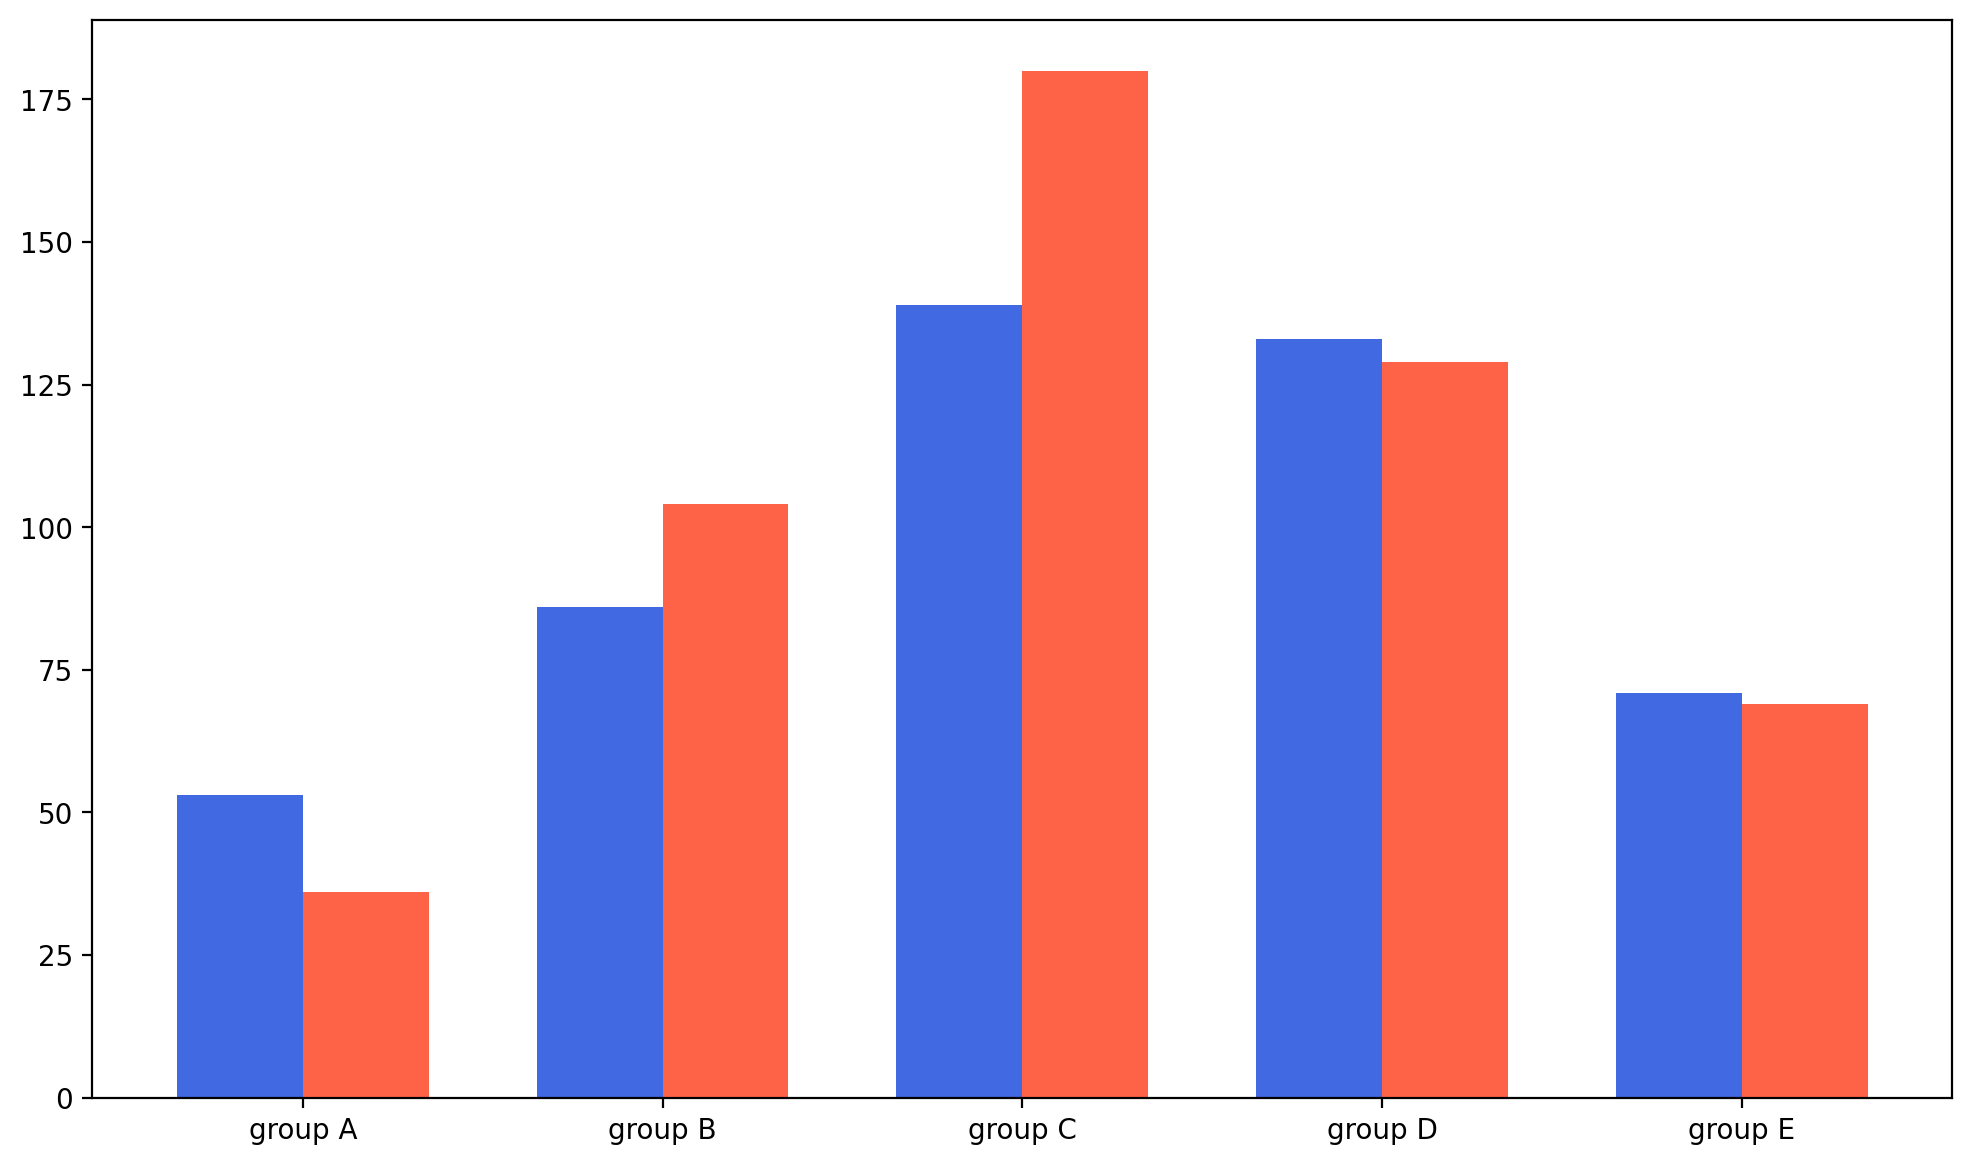

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

idx = np.arange(len(group["male"].index))
width = 0.35

ax.bar(idx-width/2, group["male"], color="royalblue", width=width)
ax.bar(idx+width/2, group["female"], color="tomato", width=width)

ax.set_xticks(idx)
ax.set_xticklabels(group["male"].index)

In [55]:
group = student_df.groupby("parental level of education")["race/ethnicity"].value_counts().sort_index()
group_list = sorted(student_df["race/ethnicity"].unique()) # ['group A', 'group B', 'group C', 'group D', 'group E']
edu_lv = student_df["parental level of education"].unique() # ['bachelor's degree', 'some college', "master's degree", 'associate's degree', 'high school', 'some high school']

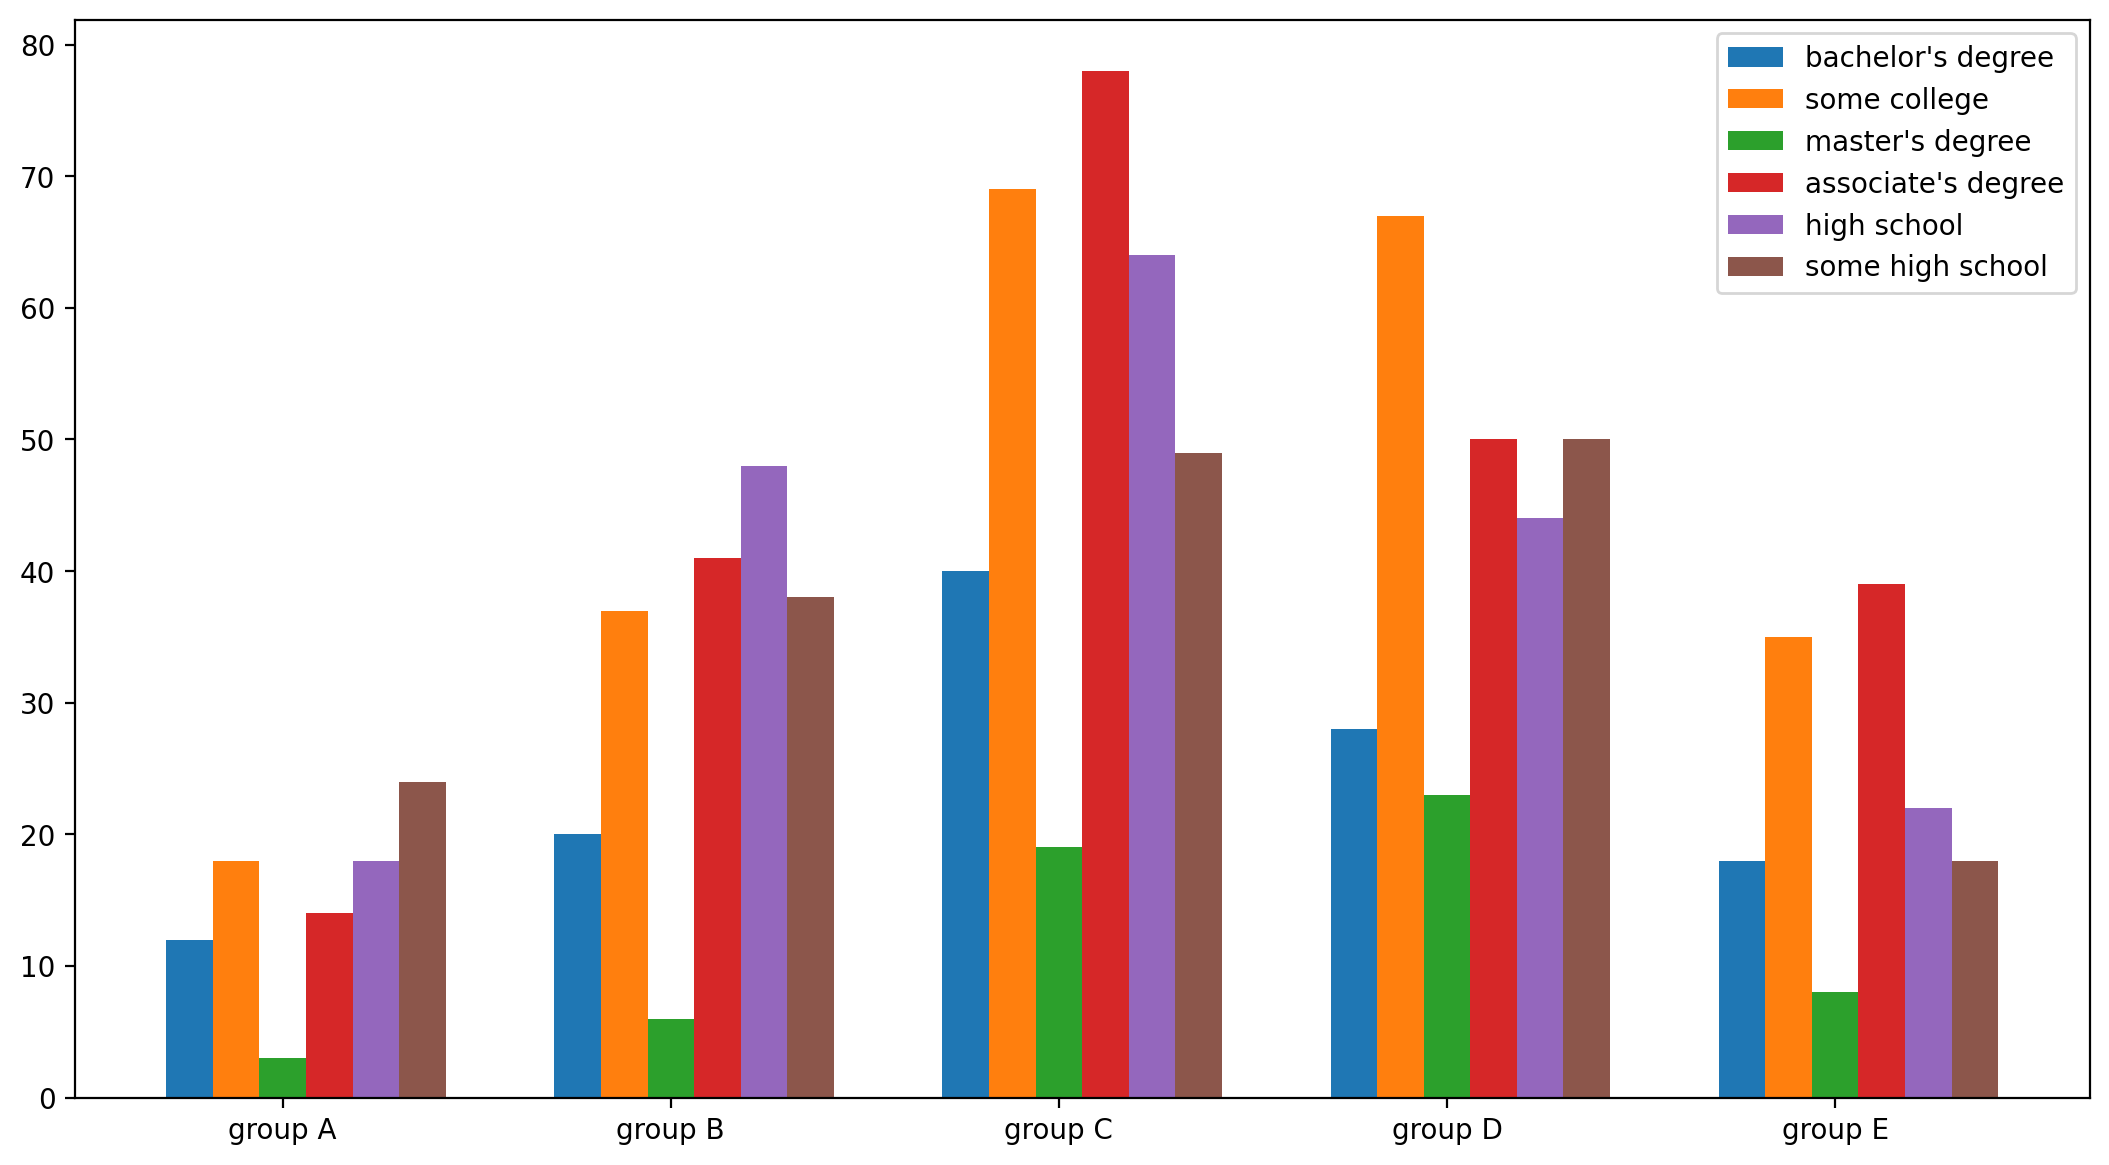

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(13, 7))

x = np.arange(len(group_list))
width=0.12

for idx, g in enumerate(edu_lv):
    ax.bar(x+width*(idx-2), group[g], width=width, label=g)
    
ax.set_xticks(x)
ax.set_xticklabels(group_list)
ax.legend()